In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pynamicalsys import ContinuousDynamicalSystem as cds, PlotStyler

In [2]:
ds = cds(model="lorenz system")

In [3]:
parameters = [16, 45.92, 4]  # From A. Wolf et al. / Determining Lyapunov exponents from a time series

In [4]:
total_time = 10000
transient_time = 5000
u = [1, 1, 1]

In [5]:
ds.integrator("rk4", time_step=0.01)

In [6]:
ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time, num_exponents=1)

array([1.49869535])

In [7]:
ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time, num_exponents=2)

array([1.49873694e+00, 1.31950729e-04])

In [8]:
ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time)

array([ 1.49885208e+00, -1.65186396e-04, -2.24977688e+01])

In [10]:
ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time, log_base=2) # To match Wolf's result

array([ 2.16238646e+00, -2.38313595e-04, -3.24574194e+01])

In [11]:
ds.integrator("rk45", atol=1e-8, rtol=1e-6)

In [12]:
%%time
ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time, num_exponents=1)

CPU times: user 4.87 s, sys: 74.6 ms, total: 4.95 s
Wall time: 4.97 s


array([1.49939476])

In [13]:
ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time, num_exponents=2)

array([ 1.50399758e+00, -2.16053440e-04])

In [14]:
ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time)

array([ 1.50316504e+00, -4.34952846e-04, -2.25027280e+01])

In [15]:
ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time, log_base=2) # To match Wolf's result

array([ 2.16860876e+00, -6.27504314e-04, -3.24645741e+01])

In [16]:
ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time, log_base=2, method="QR_HH") # To match Wolf's results

array([ 2.16664847e+00, -6.80920729e-04, -3.24625604e+01])

In [17]:
ds.integrator("rk4", time_step=0.01)
history = ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time, return_history=True)

In [18]:
history.shape

(500001, 4)

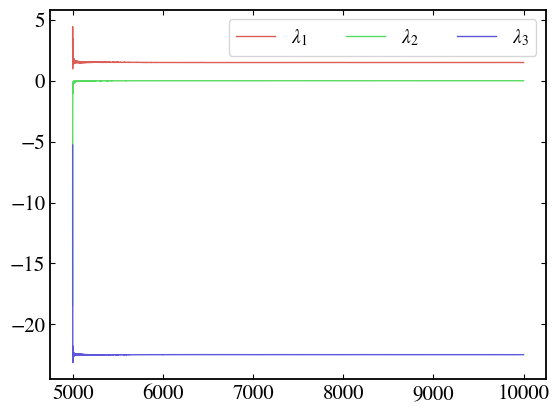

In [19]:
ps = PlotStyler(fontsize=18)
ps.apply_style()
colors = sns.color_palette("hls", history.shape[1] - 1)
for i in range(history.shape[1] - 1):
    plt.plot(history[:, 0], history[:, i + 1], color=colors[i], label=fr"$\lambda_{i + 1}$")
plt.legend(ncol=3)

In [20]:
ds.integrator("rk45", atol=1e-8, rtol=1e-6)
history_rk45 = ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time, return_history=True)

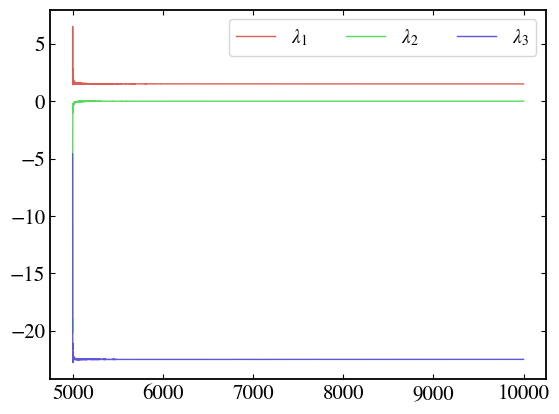

In [21]:
ps = PlotStyler(fontsize=18)
ps.apply_style()
colors = sns.color_palette("hls", history.shape[1] - 1)
for i in range(history.shape[1] - 1):
    plt.plot(history_rk45[:, 0], history_rk45[:, i + 1], color=colors[i], label=fr"$\lambda_{i + 1}$")
plt.legend(ncol=3)

<Figure size 640x480 with 0 Axes>

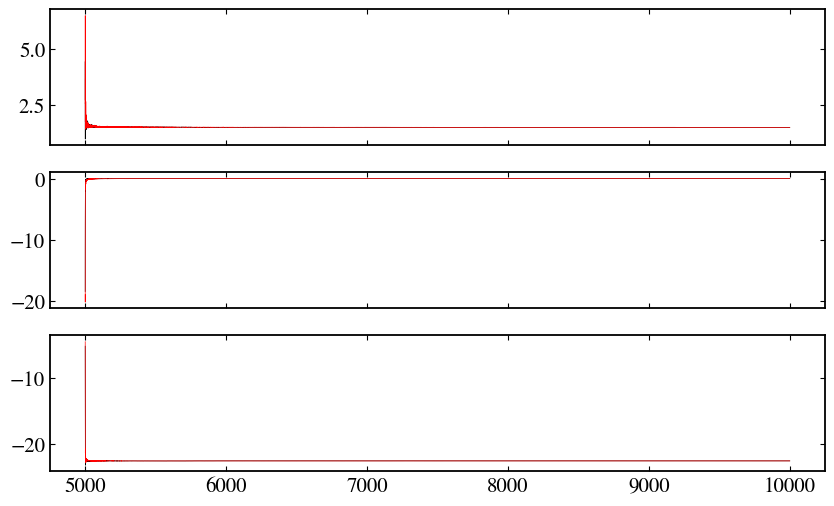

In [22]:
ps = PlotStyler(fontsize=18, linewidth=0.5)
ps.apply_style()
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(10, 6))
for i in range(history.shape[1] - 1):
    ax[i].plot(history[:, 0], history[:, i + 1], color="k")
    ax[i].plot(history_rk45[:, 0], history_rk45[:, i + 1], color="r")